In [1]:
%load_ext jupyter_ai_magics

In [2]:
from datascience import *
import numpy as np

# needed for plotting with datascience module
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from IPython.display import display, Image

In [32]:
flips = np.random.choice([0, 1], size=100)  # 0 = tails, 1 = heads
np.mean(flips)

0.46000000000000002

In [53]:
temp = []
for i in range(10000):
    flips = np.random.choice([0, 1], size=100)  # 0 = tails, 1 = heads
    temp.append(np.mean(flips))

(array([  2.00000000e+00,   1.60000000e+01,   1.38000000e+02,
          7.81000000e+02,   2.11000000e+03,   3.07800000e+03,
          2.50600000e+03,   1.07600000e+03,   2.61000000e+02,
          3.20000000e+01]),
 array([ 0.27 ,  0.311,  0.352,  0.393,  0.434,  0.475,  0.516,  0.557,
         0.598,  0.639,  0.68 ]),
 <BarContainer object of 10 artists>)

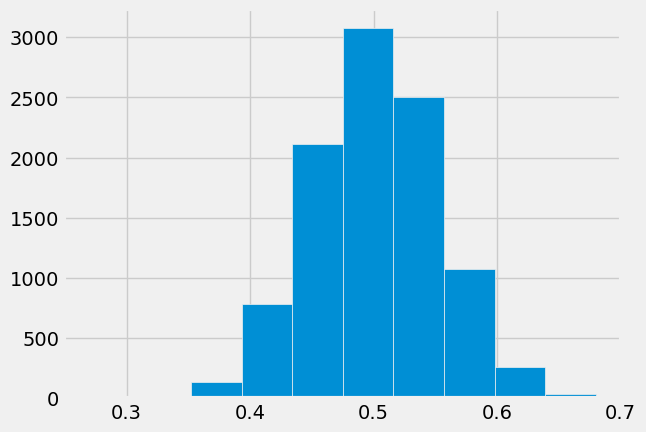

In [54]:
plt.hist(temp)

In [ ]:
# Imagine a population of 10,000 student heights (in cm)
population = np.random.normal(loc=170, scale=10, size=10000)

In [ ]:
# Take a sample of 100 students
sample = np.random.choice(population, size=100)

# Show average height in population vs sample
print("True population average height:", np.mean(population))
print("Sample average height:", np.mean(sample))

In [34]:
# Simulated data: study time (in hours) and exam scores (out of 100)
study_time = np.random.normal(loc=5, scale=2, size=100)
exam_scores = 5 * study_time + np.random.normal(loc=0, scale=5, size=100)

# Correlation coefficient
corr_matrix = np.corrcoef(study_time, exam_scores)
print("Correlation coefficient:", corr_matrix[0, 1])

Correlation coefficient: 0.92716320355


In [35]:
corr_matrix

array([[ 1.       ,  0.9271632],
       [ 0.9271632,  1.       ]])

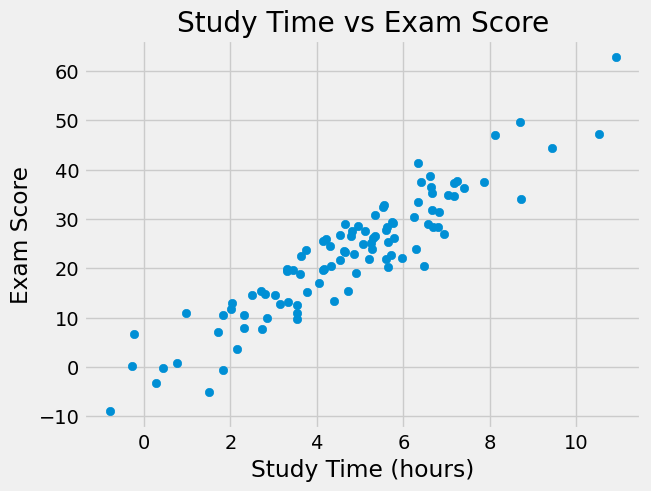

In [36]:
plt.scatter(study_time, exam_scores)
plt.title("Study Time vs Exam Score")
plt.xlabel("Study Time (hours)")
plt.ylabel("Exam Score")
plt.show()

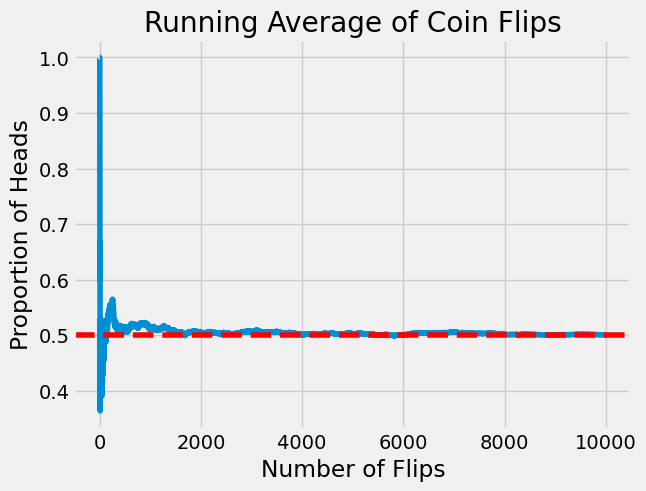

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate 10,000 coin flips
flips = np.random.choice([0, 1], size=10000)  # 0 = tails, 1 = heads

# Compute running average
running_avg = np.cumsum(flips) / np.arange(1, len(flips)+1)

# Plot it
plt.plot(running_avg)
plt.axhline(0.5, color='red', linestyle='--')
plt.title("Running Average of Coin Flips")
plt.xlabel("Number of Flips")
plt.ylabel("Proportion of Heads")
plt.show()

In [66]:
def add_noise(col):
    noise = num = np.random.uniform(-0.4, 0.4)
    return col+noise

In [68]:
def add_noise(col):
    noise = num = np.random.uniform(-0.4, 0.4)
    return col+noise
wine_quality['quality2'] = wine_quality.apply(add_noise, 'quality')

In [69]:
wine_quality

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality2
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4.86951
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5,5.07623
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5,5.26048
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6,6.30558
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,5.21103
7.4,0.66,0,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,4.95106
7.9,0.6,0.06,1.6,0.069,15,59,0.9964,3.3,0.46,9.4,5,5.11937
7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7,6.63345
7.8,0.58,0.02,2,0.073,9,18,0.9968,3.36,0.57,9.5,7,6.9685
7.5,0.5,0.36,6.1,0.071,17,102,0.9978,3.35,0.8,10.5,5,5.1925


# CMPSC 5A, S25, lab05: Wine Quality Control

In this lab, we'll dive into the fascinating world of wine quality analysis, something very topical for our local economy in Santa Barbara county.

We're going to explore a dataset from [Kaggle.com](https://www.kaggle.com/) that contains detailed information about various wines, including their chemical properties like acidity, sugar content, alcohol level, and more, as well as a quality rating given by wine experts. This dataset is not just a collection of numbers and facts; it's a doorway into understanding how different factors contribute to the taste and quality of wine.

Now, you might wonder why we can't just test every bottle to ensure top quality in a wine manufacturing plant. The answer lies in practicality and efficiency. Imagine a plant producing thousands of bottles per day - testing each one would be time-consuming and costly; if you open *every* bottle and test it, you have nothing left to sell! 

This is where the concept of sampling comes in. By carefully selecting a *representative sample* of bottles for quality testing, we can draw reliable conclusions about the overall quality of the wine production without having to test every single bottle. 

Sampling is a powerful tool in quality control, allowing us to maintain high standards efficiently and effectively. Through this dataset and our analysis, we'll uncover the secrets of what makes a great wine and learn how sampling helps maintain this greatness across batches.

## Concepts covered in this lab

In addition to sampling and simulation, we'll also briefly visit *Correlation* in this lab.

Correlation is discussed in [Section 15.1 of our textbook](https://inferentialthinking.com/chapters/15/1/Correlation.html), and explained briefly later in this lab.

You are invited to read (or review) Section 15.1 when we get to the questions about correlation.   *Don't worry* that we are skipping past many chapters; this one section does not depend on the material we are skipping over.  (However, don't feel the need to read on past Section 15.1; if you get into Section 15.2, you will encounter material we haven't covered yet.)

## The wine_quality table

Let's explore the wine quality table:

In [3]:
wine_quality = Table().read_table("data/winequality-red.csv")

def add_noise(col):
    noise = num = np.random.uniform(-0.5, 0.5)
    return col+noise
wine_quality['quality'] = wine_quality.apply(add_noise, 'quality')

wine_quality.show(5)

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


# Part 1: Correlations

Correlation is a measure of the  strength and direction of relationship between two
variables.  It ranges from -1 to +1

* +1: Perfect positive correlation
* -1: Perfect negative correlation
* 0: No correlation

The formula for correlation is:

$ r = \frac{\sum{(x - \mu_x)(y - \mu_y)}}{\sigma_x \sigma_y} $


Or, on one line: r = Σ((x - μₓ)(y - μᵧ)) / (σₓσᵧ)

Fortunately, we don't really need to implement the details of this mathematical formula;  `numpy` will compute this for us with this function:

```
np.corrcoef(array_1, array_2)
```

The following table shows how we can interpret the results:

| Correlation Coefficient (r) | Strength & Direction         |
|-----------------------------|-------------------------------|
| +1.0                        | Perfect positive correlation  |
| +0.7 to +0.9                | Strong positive correlation   |
| +0.4 to +0.6                | Moderate positive correlation |
| +0.1 to +0.3                | Weak positive correlation     |
| 0                           | No correlation                |
| -0.1 to -0.3                | Weak negative correlation     |
| -0.4 to -0.6                | Moderate negative correlation |
| -0.7 to -0.9                | Strong negative correlation   |
| -1.0                        | Perfect negative correlation  |


**Correlation Example**: We can assess the correlation between residual sugar and alcohol in the `wine_quality` dataset with this calculation:


In [ ]:
sugar = wine_quality.column("residual sugar")
alcohol = wine_quality.column("alcohol")
sugar_vs_alcohol_pearson_correlation = np.corrcoef(sugar, alcohol)
sugar_vs_alcohol_pearson_correlation

Note that the answer you get back is expressed as a 2x2 matrix, like this:

```
array([[ 1.        ,  0.04207544],
       [ 0.04207544,  1.        ]])
```

The actual pearson coefficient is in position `[0][1]` and `[1][0]`.  The reason is that we specified two variables, and what we are getting back is actually the coefficients for every combination of those, including comparing each variable with itself (which, obviously, has a correlation of 1.0).

We can also specify three variables, but to do that, we need to structure things a bit differently.


In [ ]:
sugar = wine_quality.column("residual sugar")
alcohol = wine_quality.column("alcohol")
quality = wine_quality.column("quality")

data = np.array([sugar, alcohol, quality])
three_way_comparison = np.corrcoef(data)
three_way_comparison

Here's how to interpet this data:

|         | sugar                       | alcohol                      | quality                       |
|---------|-----------------------------|------------------------------|-------------------------------|
| sugar   | sugar,sugar (1.0)           | sugar,alcohol (0.04207544)   | sugar, quality (0.01373164)   |
| alcohol | alcohol,sugar (0.04207544)  | alcohol,alcohol (1.0)        | alcohol, quality (0.47616632) |
| quality | quality,sugar (0.01373164)  | quality,alcohol (0.47616632) | quality, quality (1.0) |

This extends to as many dimensions as you want.

**Using Scatter Plots to show correlations**

We can also get a sense of correlations through scatter plots.  Highly correlated data will cluster near something like a "line", while uncorrelated data will be scattered all over the $x,y$ Cartesian plane.

For example, since there seems to be a "moderate positive" correlation between alcohol and quality, let's plot those on an x,y scatter plot.  We'll include `fit_line=True`; this shows what is called a *regression line*.  

This *regression line* is related to the Pearson correlation coefficient, though that's all we are going to say about it for now; we'll explore that relationship later in the course if time permits.). For now, we'll just say that it helps us to see what the relationship between the data looks like, if there is one.



In [ ]:
wine_quality.scatter("alcohol","quality", fit_line=True)

Here's one more calculation of correlation and the scatter plot to go with it.  From the names and a persual of the data, we might expect `fixed acidity` and  	`volatile acidity` to be correlated.  Here's that calcuation:

In [ ]:
fixed = wine_quality.column("fixed acidity")
volatile = wine_quality.column("volatile acidity")
fixed_vs_volatile = np.corrcoef(fixed, volatile)
fixed_vs_volatile

Looks like it's a weak negative correlation.  Here's the plot:

In [ ]:
wine_quality.scatter("fixed acidity","volatile acidity", fit_line=True)

As you can see, the `fit_line` has a negative slope, which correponds to the negative value for the Pearson coefficient.

**Q1.1** Lets quickly analyze some key columns in our dataset using sampling. 

First, use the code cell below to obtain a random sample of 100 wines from the dataset. 

Then, in the markdown/text cell, answer these questions:
1. What is the average quality rating of the sampled wines?
2. Does this average differ significantly from the overall average quality rating in the full dataset?

In [ ]:
# SOLUTION (code to obtain random sample of 100 wines)
random_sample = ...
average_quality_rating_of_sample = ...
average_quality_of_entire_dataset = ...

*SOLUTION* (answer both text questions) 
1. answer here
2. answer here

### Prompt Here

In [ ]:
%%ai openai-chat:gpt-3.5-turbo

### Workflow

Enter Workflow Here.

**Q1.2** Using your random sample, identify the top three chemical properties that correlate the most strongly with the wine quality. 

You must have visualizations supporting your conclusions.

Hint: One approach is scatter plots that compare quality on one axis, and each of the other qualities on the other axis.

Note: You need to provide three things to get full credit for this question:
* A text cell explaining the top three chemical properties that correlate most strongly with the wine quality
* Visualizations and/or data tables to support your conclusions
* The code that produces those

*SOLUTION* (your English text answer goes here where you identify the top three chemical properties that correlate with wine quality, and explain how you arrived at that conclusion.  Make reference to the tables or visualizations below that you used to come up with your answer.)

In [ ]:
# SOLUTION CODE CELLS (you will likely need multiple cells; 
# add as many as you need; delete the extra ones that you don't end up using)

In [ ]:
# SOLUTION CODE CELLS (you will likely need multiple cells; 
# add as many as you need; delete the extra ones that you don't end up using)

In [ ]:
# SOLUTION CODE CELLS (you will likely need multiple cells; 
# add as many as you need; delete the extra ones that you don't end up using)

In [ ]:
# SOLUTION CODE CELLS (you will likely need multiple cells; 
# add as many as you need; delete the extra ones that you don't end up using)

In [ ]:
# SOLUTION CODE CELLS (you will likely need multiple cells; 
# add as many as you need; delete the extra ones that you don't end up using)

### Prompt Here

In [ ]:
%%ai openai-chat:gpt-3.5-turbo

### Workflow

Enter Workflow Here.

# Part 2: Identifying High Quality Wines

Pretend you are a wine quality tester. Your job is to identify the best wines given the following information. A high quality wine can be identified by the following factors:

1. High **quality** (7 or above)
2. Low **pH** value leading to good acidity (3.26 and below)
3. Just the right amount of total sulfur dioxide (Between 35 and 50)

These three factors are going to help you identify the high quality wines in this data. We are going to see exactly how rare a good high quality red wine is using probability. We will also leverage sampling and simulation to see the law of large numbers in action.

**Q2.1** Based on this data set, what is the probability of getting a wine that satisfies condition 1?

Hint: Compute how many wines in the data set have this property, and divide by the total number of rows in the data set.



In [ ]:
#SOLUTION

### Prompt Here

In [ ]:
%%ai openai-chat:gpt-4

### Workflow

Enter Workflow Here.

**Q2.2** What is the probability of getting a wine that satisfies condition 1 and condition 2?

In [ ]:
#SOLUTION

### Prompt Here

In [ ]:
%%ai openai-chat:gpt-4

### Workflow

Enter Workflow Here.

**Q2.3** What is the probability of getting a wine that satisfies all three conditions?

In [ ]:
#SOLUTION

### Prompt Here

In [ ]:
%%ai openai-chat:gpt-4

### Workflow

Enter Workflow Here.

# Part 3: The Law of Averages 

The Law of Averages states the following: 

> If a chance experiment is repeated independently and under identical conditions, then, in the long run, the proportion of times that an event occurs gets closer and closer to the theoretical probability of the event.

The law above implies that if the chance experiment is repeated a large number of times then the proportion of times that an event occurs is very likely to be close to the theoretical probability of the event.

**Q3.1** Complete the function below called `high_quality_low_ph_fraction()` that take a table of rows from this data set as a parameter, and compute the fraction of them that meet both the conditions in the previous question, i.e.

* High quality (7 or above)
* Low pH value leading to good acidity (3.26 and below)

After you define it, run it on the entire table with the line shown (`high_quality_low_ph_fraction(wine_quality)`)

In [ ]:
# SOLUTION (finish the function definition by replacing the ... with the needed code)

def high_quality_low_ph_fraction(winetable):
    new_table = winetable.where(...) # finish this 
    return new_table.num_rows / winetable.num_rows

high_quality_low_ph_fraction(wine_quality)

Then run this on a *random sample* of 50 wines from the table.   Note that each time you run the cell, the value obtained may be different, because your sample is different.   Keep running this until you see the value change, and notice whether the value is above, below or close to the value for the entire dataset.

In [ ]:
high_quality_low_ph_fraction(wine_quality.sample(50))

### Prompt Here

In [ ]:
%%ai openai-chat:gpt-4

### Workflow

Enter Workflow Here.

**Q3.2** Now, lets observe the law of large numbers in action. 

Consider the line of code in the previous problem:

```python
high_quality_low_ph_fraction(wine_quality.sample(50))
```

Each time we run this by hand, we get a different estimate of the proportion of wines that meet the two quality criteria (high quality, low acidity, i.e. quality >= 7, pH <= 3.26).

We could sit here all day pressing shift enter on the cell above and watching the numbers change.
But it's more efficient to let the computer do that for us.

Here's a function definition that will allow us to speed up this process.

It will run this function a specified number of times; we'll call this value `n`, because it's the number
of repetitions.

The function:
* Initializes an empty list
* Loops through a number of times
* Runs the `high_quality_low_ph_fraction` on a random sample of 50 wines
* Appends the result to a list
* At the end, converts that list to a `numpy` array and returns it:

In [ ]:
def get_samples(n):
    samples = []
    for i in range(n):
        sample = high_quality_low_ph_fraction(wine_quality.sample(50))
        samples.append(sample)
    return np.array(samples)

get_samples(10)

Let's try doing this four times.  

* Call the function `get_samples` with values 10, 100, 1000, and 10000.
* Assign those results to variables called `samples_10`, `samples_100`, `samples_1000` and `samples_10000`.
* Plot a histogram of each of those four arrays
* Print out the mean of each of those four arrays

**Q3.2a** (10 repetitions)


In [ ]:
# SOLUTION (compute samples_10)

samples_10 = ...

In [ ]:
# SOLUTION (show histogram of samples_10, and mean(average) of samples_10)
# Hint: Create a table with a single column, using your samples_10 data, then use the .hist() method on that 
# Then display the mean of samples_10


**Q3.2b** (100 repetitions)

In [ ]:
# SOLUTION (compute samples_100)

samples_100 = ...

In [ ]:
# SOLUTION (show histogram and mean)


**Q3.2c** (1000 repetitions)

In [ ]:
# SOLUTION (compute samples_1000)

samples_1000 = ...

In [ ]:
# SOLUTION (show histogram and mean)


**Q3.2d** (10000 repetitions)

In [ ]:
# SOLUTION (compute samples_1000)

samples_10000 = ...

In [ ]:
# SOLUTION (show histogram and mean)


### Prompt Here (for Q3.2 all parts)

In [ ]:
%%ai openai-chat:gpt-4

### Workflow (for Q3.2 all parts)

Enter Workflow Here.

**Q3.4** Now, look at all four histograms above, as well as the means for all four values of `n`. 

Compare each of these to the actual fraction of wines that meet the two quality criteria in the entire data set (your answer to  Q2.2.

In the Markdown cell below, discuss any trends you observed as you increased the number of times you took a random sample of 50 wines. 

*SOLUTION* (as English text)

### Prompt Here

In [ ]:
%%ai openai-chat:gpt-4

### Workflow

Enter Workflow Here.

**Q3.5** Now lets switch it up a notch. Simulate the probability in Q2.2 again by sampling **500** wines randomly from the dataset. Run the simulation 10, 100, 1000 and 10000 times. 

Plot a histogram of the probability values you observed during each simulation process and compute the average probability from each simulation (just as you did in Q3.2).

Note that you may want to define a new function to do this (similar to the `get_samples` function where we hard coded the sample size as 50.)

You'll probably need multiple code cells for your solution as well.   Add as many as you need.


In [ ]:
# SOLUTION code cells

In [ ]:
# SOLUTION code cells

In [ ]:
# SOLUTION code cells

In [ ]:
# SOLUTION code cells

In [ ]:
# SOLUTION code cells

### Prompt Here

In [ ]:
%%ai openai-chat:gpt-4

### Workflow

Enter Workflow Here.

##### **Q3.6** Now what changes do you observe? Does the simulated probability converge to the actual probability faster? Slower? Is it more or less accurate?

*SOLUTION* (as English text; be sure you answer *all* parts of the question)

### Prompt Here

In [ ]:
%%ai openai-chat:gpt-4

### Workflow

Enter Workflow Here.

# Finishing and submitting

Congratulations, you're done with Lab 5!  Be sure to 
- **Keep all your prompts** . 
- **Save and Checkpoint** from the `File` menu.
- **Ensure every cell has been run (has a number Ex:[34] beside the cell)**.
- Submit to Gradescope!